In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2022-06-19 10:02:07.094363: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-19 10:02:07.094398: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Approach-1

In [2]:
# X-Data
N = 200
X = np.random.random(N)

In [3]:
# Generation Y-Data
sign = (- np.ones((N,)))**np.random.randint(2,size=N)
Y = np.sqrt(X) * sign

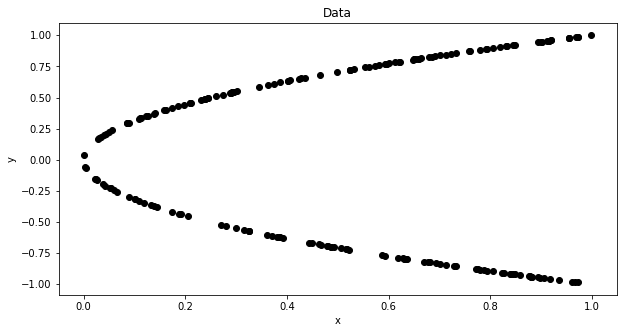

In [12]:
plt.figure(figsize=(10,5))
plt.plot(X,Y,'ko')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.savefig("data.jpeg")
plt.show()

In [5]:
# Neural network
act = tf.keras.layers.ReLU()
nn_sv = tf.keras.models.Sequential([
tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
tf.keras.layers.Dense(10, activation=act),
tf.keras.layers.Dense(1,activation='linear')])

2022-06-19 10:02:13.004618: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-19 10:02:13.004654: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-19 10:02:13.004675: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vikas-Inspiron-3558): /proc/driver/nvidia/version does not exist
2022-06-19 10:02:13.004922: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Loss function
loss_sv = tf.keras.losses.MeanSquaredError()
optimizer_sv = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_sv.compile(optimizer=optimizer_sv, loss=loss_sv)
# Training
results_sv = nn_sv.fit(X, Y, epochs=50, batch_size= 5, verbose=1)

Epoch 1/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5052
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4972
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4938
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4925
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4942
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4922
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4926
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4930
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4919
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4943
Epoch 11/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4926
Epoch 12/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4924
Epoch 13/50
40/40 [==============================

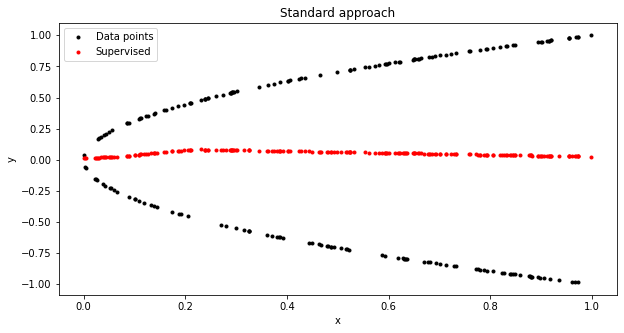

In [13]:
# Results
plt.figure(figsize=(10,5))
plt.plot(X,Y,'.',label='Data points', color="black")
plt.plot(X,nn_sv.predict(X),'.',label='Supervised', color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Standard approach')
plt.legend()
plt.savefig("standard.jpeg")
plt.show()

### Approach-2

In [8]:
# X-Data
# X = X , we can directly re-use the X from above, nothing has changed...
# Y is evaluated on the fly
# Model
nn_dp = tf.keras.models.Sequential([
tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
tf.keras.layers.Dense(10, activation=act),
tf.keras.layers.Dense(1, activation='linear')])

In [9]:
#Loss
mse = tf.keras.losses.MeanSquaredError()
def loss_dp(y_true, y_pred):
    return mse(y_true,y_pred**2)
optimizer_dp = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_dp.compile(optimizer=optimizer_dp, loss=loss_dp)

In [10]:
#Training
results_dp = nn_dp.fit(X, X, epochs=50, batch_size=5, verbose=1)

Epoch 1/50
40/40 [==============================] - 0s 2ms/step - loss: 0.3064
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1431
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 11/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 12/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 13/50
40/40 [==============================

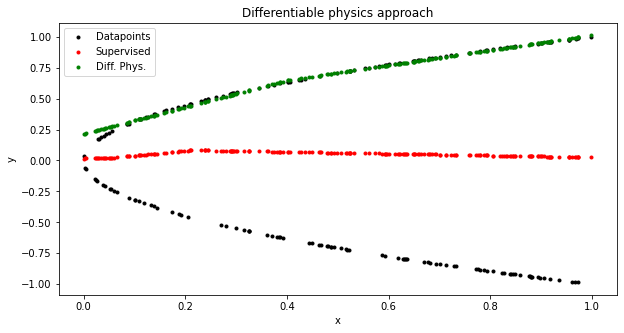

In [14]:
# Results
plt.figure(figsize=(10,5))
plt.plot(X,Y,'.',label='Datapoints', color="black")
plt.plot(X,nn_sv.predict(X),'.',label='Supervised', color="red") # optional for comparison
plt.plot(X,nn_dp.predict(X),'.',label='Diff. Phys.', color="green")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Differentiable physics approach')
plt.legend()
plt.savefig("diff_physics.jpeg")
plt.show()